<a href="https://colab.research.google.com/github/albert-melo/ProgCiencia-de-Dados/blob/master/WorkProgCienciaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho da Disciplina Programação para Ciência de Dados


Aluno:

> Albert Lima de Melo



Montagem do Drive para acesso a base de dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importando a base de dados **_dados-curso-completo.csv_** contendo 1.658.825 registros do Twitter




In [5]:
import pandas as pd
dados = pd.read_csv("/content/drive/My Drive/WorkProgCD/dados-curso-completo.csv")


*Visão Geral dos Dados*

Dados Originais
1. Devem apresentar um resumo (sumário) com as estatísticas dos dados originais, ou seja, sem qualquer pré-processamento. A apresentação deste tipo de informação é relevante para que outras pessoas possam ter uma visão geral dos dados. As estatísticas podem ser apresentadas através de tabelas e/ou gráficos.


In [25]:
dados.head()


,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


In [9]:
print("Colunas que compõem a base de dados: ")
dados.columns

Colunas que compõem a base de dados: 


Index(['data', 'usuario', 'apelido', 'texto', 'retweet', 'seguidores',
       'idioma', 'lugar', 'pais', 'sigla', 'latitude', 'longitude',
       'hashtags'],
      dtype='object')

In [12]:
print("Resumo dos dados: ")

print( dados.describe())

Resumo dos dados: 
            retweet    seguidores     latitude    longitude
count  1.658825e+06  1.658825e+06  8720.000000  8720.000000
mean   1.978533e+02  3.257206e+04   -40.237583   -11.117100
std    6.337641e+03  3.680300e+05    20.808494    19.169105
min    0.000000e+00  0.000000e+00  -123.120400   -37.818769
25%    0.000000e+00  1.010000e+02   -47.864334   -23.305300
50%    0.000000e+00  3.800000e+02   -43.955615   -19.624400
75%    0.000000e+00  1.470000e+03   -38.453198    -7.120700
max    1.139763e+06  8.424125e+07   174.789310    58.257776


In [42]:
paises = dados["pais"].value_counts()

len(paises)

locais = dados[ dados["latitude"].isna()==False]

len(locais)


8720

In [43]:
pip install geopandas

In [45]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame 

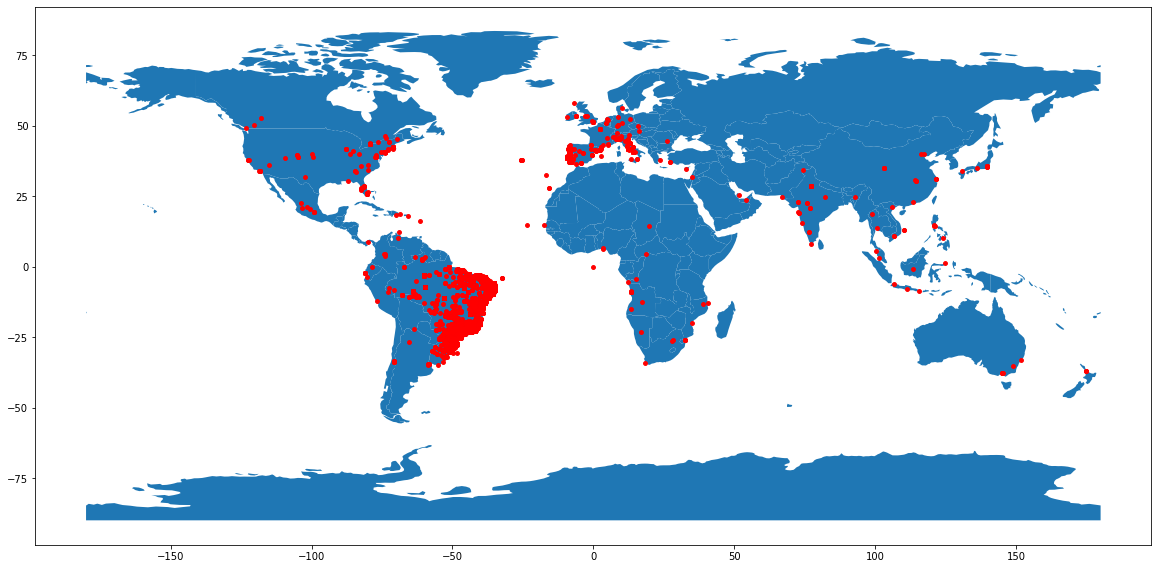

In [56]:
geometry  = [Point(xy) for xy in zip(locais['latitude'], locais['longitude'])]
gdf = GeoDataFrame(locais, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 12)), marker = 'o', color = 'red', markersize = 15)

Postagens

In [178]:
#dados["texto"][i] = str.upper(dados["texto"][i])

registro = {'data':'', 'usuario':'', 'apelido':'', 'duvida':'', 'retweet':'', 'seguidores':'', 'idioma':'', 'lugar':'', 'pais':'', 'sigla': '', 'latitude':'' , 'longitude':'', 'hashtags':'' }

dados['texto'] = dados['texto'].str.upper()

pre_perguntas = dados[ dados["texto"].str.contains("?", regex =False)]



#duvidasdb = list()

#for i in range(2): #pre_perguntas.index:
#  pre_perguntas["texto"][i]
#  texto = str(pre_perguntas.at[i, "texto"])
#  pergunta = texto.split("?")
  
#  print(pergunta)



In [182]:
pre_perguntas.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BOLSONAROSP CADE O FUNDÃO DEPUTADO??? CONGRES...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,FUMAÇA DE CIGARRO PODE PROPAGAR CORONAVÍRUS? H...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
38,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@IPRATESMD @DR_PAMPERS SERÁ QUE CORREMOS O RIS...,0,86,pt,NaN,NaN,NaN,NaN,NaN,[]
45,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,PRIORIDADE ?!\n\n #COVID19 #FLORIPA #ISOLAMENT...,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
57,2020-03-30 00:43:36,Valnei do Val,vdoval,"QUE TAL UMA NOTÍCIA BOA, INDO NA CONTRAMÃO DO ...",0,201,pt,NaN,NaN,NaN,NaN,NaN,[]
